In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-estate-data-uae/uae_properties.csv


# Reading the data and get some infomation and statistics.

In [2]:
re = pd.read_csv("/kaggle/input/real-estate-data-uae/uae_properties.csv")
re.head()

,id,title,displayAddress,bathrooms,bedrooms,addedOn,type,rera,propertyType,price
0,10837871,★ EXCLUSIVE RELEASE ★ | LUXURY 3 BED FLAT | GO...,"Sobha One, Sobha Hartland, Mohammed Bin Rashid...",2,3,2024-01-06T17:05:24+00:00,buy,8.171857e+08,apartment,3950000
1,10880180,"★ BUY NOW 624,000AED ★ (20% FIRST PAYMENT + 4%...","Sobha Verde, Jumeirah Lake Towers, Dubai",2,3,2024-01-13T21:19:31+00:00,buy,8.171857e+08,apartment,2600000
2,11220200,GREEN HEART OF DUBAI |URBAN DESIGN | LUXURY LI...,"Park Horizon, Dubai Hills Estate, Dubai",2,3,2024-03-12T03:18:54+00:00,buy,2.125966e+09,apartment,3450000
3,11176502,Prime Location | Corner Spacious Unit | Bright...,"AZIZI Riviera, Meydan One, Meydan, Dubai",2,3,2024-03-04T06:53:51+00:00,buy,7.114978e+10,apartment,2000000
4,11179908,Very Limited | Ideal For Investment | 40% Disc...,"Verdana, Dubai Investment Park, Dubai",2,0,2024-03-04T13:24:39+00:00,buy,4.652616e+08,apartment,284000


In [3]:
re.columns

Index(['id', 'title', 'displayAddress', 'bathrooms', 'bedrooms', 'addedOn',
       'type', 'rera', 'propertyType', 'price'],
      dtype='object')

In [4]:
re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              492 non-null    int64  
 1   title           492 non-null    object 
 2   displayAddress  492 non-null    object 
 3   bathrooms       492 non-null    int64  
 4   bedrooms        492 non-null    int64  
 5   addedOn         492 non-null    object 
 6   type            492 non-null    object 
 7   rera            323 non-null    float64
 8   propertyType    492 non-null    object 
 9   price           492 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 38.6+ KB


In [5]:
re.isna().sum()

id                  0
title               0
displayAddress      0
bathrooms           0
bedrooms            0
addedOn             0
type                0
rera              169
propertyType        0
price               0
dtype: int64

In [6]:
re.describe()

,id,bathrooms,bedrooms,rera,price
count,4.920000e+02,492.0,492.000000,3.230000e+02,4.920000e+02
mean,1.089778e+07,2.0,2.140244,1.562928e+10,2.166491e+06
std,3.890556e+05,0.0,1.357879,2.843012e+10,2.126998e+06
min,8.741796e+06,2.0,0.000000,8.470901e+06,2.330000e+05
25%,1.074976e+07,2.0,0.000000,8.186209e+08,9.529638e+05
50%,1.104052e+07,2.0,3.000000,1.678338e+09,1.499000e+06
75%,1.117956e+07,2.0,3.000000,7.131427e+09,2.434250e+06
max,1.125045e+07,2.0,3.000000,2.022028e+11,1.450000e+07


---
---

# Making some repairs in the data.

1. Drop the columns that we don't need.

In [7]:
re.drop(["rera","propertyType","type"],axis = 1,inplace = True)

In [8]:
re.head()

,id,title,displayAddress,bathrooms,bedrooms,addedOn,price
0,10837871,★ EXCLUSIVE RELEASE ★ | LUXURY 3 BED FLAT | GO...,"Sobha One, Sobha Hartland, Mohammed Bin Rashid...",2,3,2024-01-06T17:05:24+00:00,3950000
1,10880180,"★ BUY NOW 624,000AED ★ (20% FIRST PAYMENT + 4%...","Sobha Verde, Jumeirah Lake Towers, Dubai",2,3,2024-01-13T21:19:31+00:00,2600000
2,11220200,GREEN HEART OF DUBAI |URBAN DESIGN | LUXURY LI...,"Park Horizon, Dubai Hills Estate, Dubai",2,3,2024-03-12T03:18:54+00:00,3450000
3,11176502,Prime Location | Corner Spacious Unit | Bright...,"AZIZI Riviera, Meydan One, Meydan, Dubai",2,3,2024-03-04T06:53:51+00:00,2000000
4,11179908,Very Limited | Ideal For Investment | 40% Disc...,"Verdana, Dubai Investment Park, Dubai",2,0,2024-03-04T13:24:39+00:00,284000


---

2. I think there are no apartment without bedrooms so let's fix this and make all of them with 3 bedrooms.

In [9]:
re["bedrooms"].value_counts()

bedrooms
3    351
0    141
Name: count, dtype: int64

In [10]:
re["bedrooms"] = re["bedrooms"].replace(0,3)

In [11]:
re["bedrooms"].value_counts()

bedrooms
3    492
Name: count, dtype: int64

---

3. Making a function to extract the name of the city from the "displayAddress" column and put them in a new column.

In [12]:
known_cities = ["Dubai", "Abu Dhabi", "Sharjah", "Ajman", "Ras Al Khaimah", "Fujairah", "Umm Al Quwain", "Al Ain"]
def extract(address) :
    for city in known_cities :
        if city in address :
            return city
        

In [13]:
re["city"] = re["displayAddress"].apply(extract)

In [14]:
re.head()

,id,title,displayAddress,bathrooms,bedrooms,addedOn,price,city
0,10837871,★ EXCLUSIVE RELEASE ★ | LUXURY 3 BED FLAT | GO...,"Sobha One, Sobha Hartland, Mohammed Bin Rashid...",2,3,2024-01-06T17:05:24+00:00,3950000,Dubai
1,10880180,"★ BUY NOW 624,000AED ★ (20% FIRST PAYMENT + 4%...","Sobha Verde, Jumeirah Lake Towers, Dubai",2,3,2024-01-13T21:19:31+00:00,2600000,Dubai
2,11220200,GREEN HEART OF DUBAI |URBAN DESIGN | LUXURY LI...,"Park Horizon, Dubai Hills Estate, Dubai",2,3,2024-03-12T03:18:54+00:00,3450000,Dubai
3,11176502,Prime Location | Corner Spacious Unit | Bright...,"AZIZI Riviera, Meydan One, Meydan, Dubai",2,3,2024-03-04T06:53:51+00:00,2000000,Dubai
4,11179908,Very Limited | Ideal For Investment | 40% Disc...,"Verdana, Dubai Investment Park, Dubai",2,3,2024-03-04T13:24:39+00:00,284000,Dubai


---
---

# Let's do some visualizations that give us some infomation.

1. knowing the number of apartments that are offered in each city.

In [15]:
re["city"].value_counts()

city
Dubai             307
Abu Dhabi         122
Sharjah            43
Ras Al Khaimah     14
Ajman               6
Name: count, dtype: int64

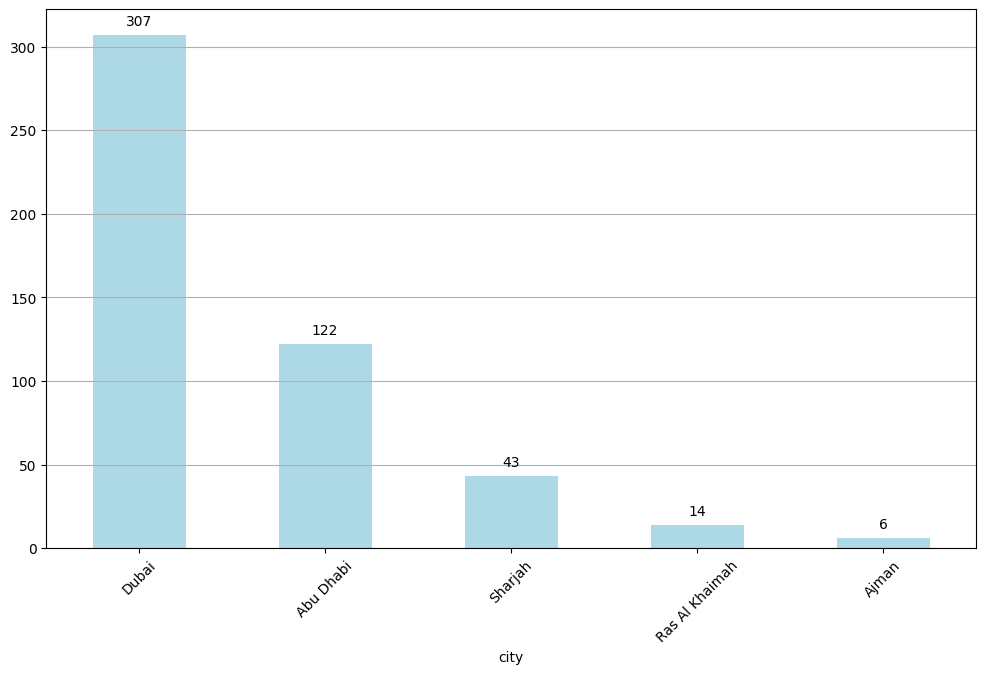

In [16]:
num = re["city"].value_counts().plot(kind = "bar" , figsize = (12,7), color = "lightblue")
num.bar_label(num.containers[0], padding = 5)
plt.xticks(rotation = 45)
plt.grid(axis ='y')
plt.show()

---

2. knowing the mean of the price in each city.

In [17]:
re.groupby("city")["price"].mean().sort_values(ascending=False)

city
Ras Al Khaimah    2.812817e+06
Dubai             2.587409e+06
Abu Dhabi         1.411759e+06
Sharjah           1.348680e+06
Ajman             3.286667e+05
Name: price, dtype: float64

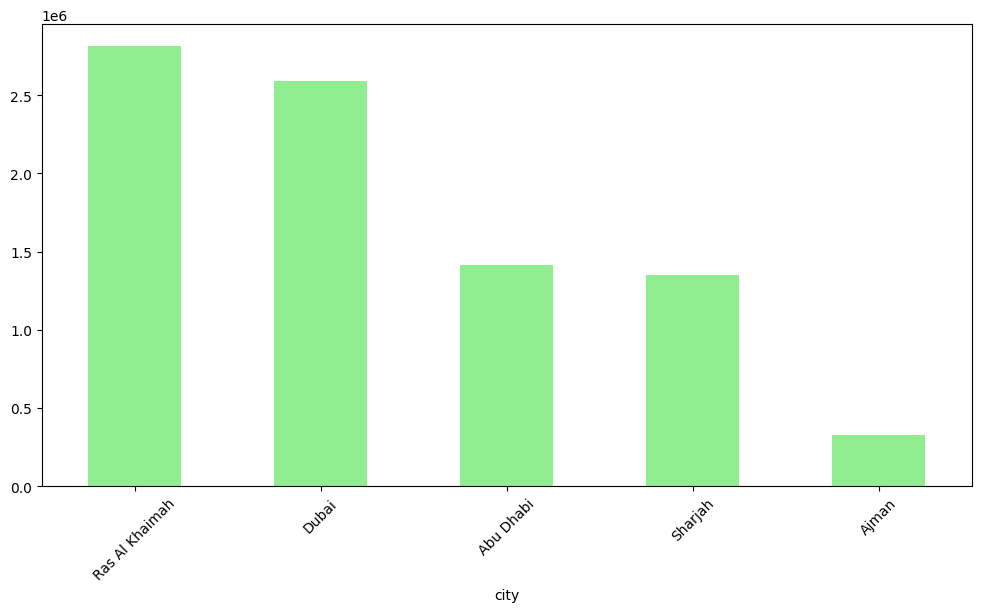

In [18]:
re.groupby("city")["price"].mean().sort_values()[::-1].plot(kind = "bar" , color = "lightgreen", figsize = (12,6))
plt.xticks(rotation =45)
plt.show()

---

3. Knowing the distribution of the price.

<Axes: title={'center': 'price'}, xlabel='[city]'>

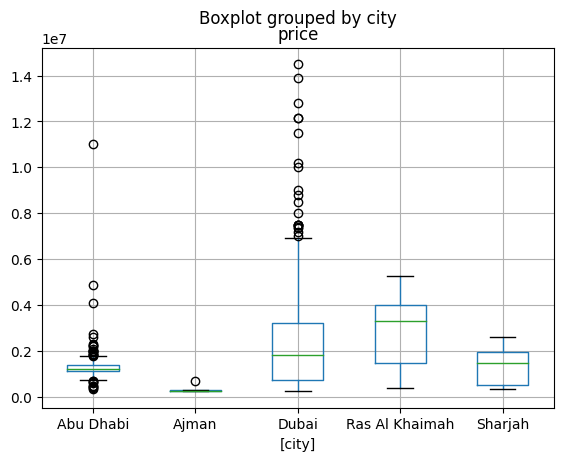

In [19]:
re[["city","price"]].boxplot(by = "city")

We notice above that there are some outliers in Abu Dhabi and Ajman and Dubai.

Let's find out the outliers in Dubai that are more than the usual range.

In [20]:
re.loc[re["city"]=="Dubai","price"].describe()

count    3.070000e+02
mean     2.587409e+06
std      2.458281e+06
min      2.480000e+05
25%      7.495000e+05
50%      1.800630e+06
75%      3.225000e+06
max      1.450000e+07
Name: price, dtype: float64

In [21]:
re.loc[re["city"]=="Dubai","price"].quantile(.75)

3225000.0

The number of apartmens that their price is more than usual is:

In [22]:
re.loc[(re["city"]== "Dubai") & (re["price"] > 3225000.0)].shape[0]

77

---
---

Let's find out the outliers in Abu Dhabi that are more and less than the usual range.

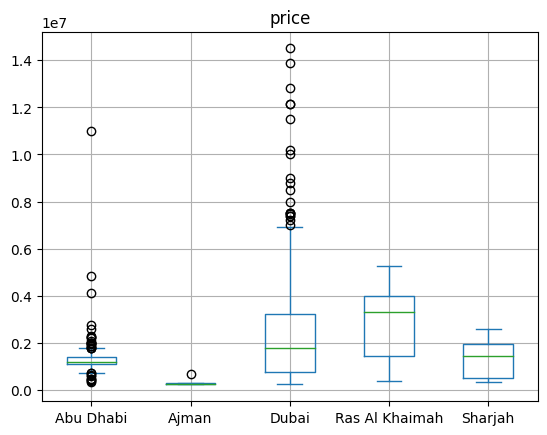

In [23]:
re[["city","price"]].plot(kind = "box",by = "city")
plt.grid(axis = "both")


In [24]:
re.loc[re["city"]=="Abu Dhabi","price"].describe()

count    1.220000e+02
mean     1.411759e+06
std      1.051833e+06
min      3.200000e+05
25%      1.118650e+06
50%      1.200000e+06
75%      1.382250e+06
max      1.100000e+07
Name: price, dtype: float64

In [25]:
re.loc[re["city"]=="Abu Dhabi","price"].quantile(.25)

1118650.0

In [26]:
re.loc[(re["city"]== "Abu Dhabi") & (re["price"] < 1118650.0)].shape[0]

31

The outliers in Abu Dhabi that are more than the usual range : 31

In [27]:
re.loc[re["city"]=="Abu Dhabi","price"].quantile(.75)

1382250.0

In [28]:
re.loc[(re["city"]== "Abu Dhabi") & (re["price"] > 1382250.0)].shape[0]

31

The outliers in Abu Dhabi that are less than the usual range : 31

The total of outliers in Abu Dhabi is 62

---
---

Let's find out the outliers in Ajman that are more than the usual range.

<Axes: title={'center': 'price'}, xlabel='[city]'>

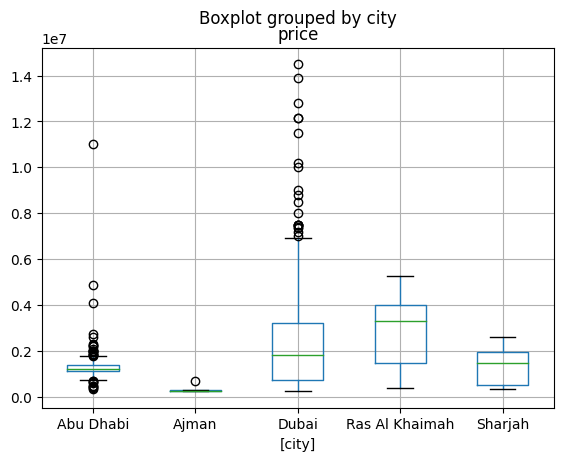

In [29]:
re[["city","price"]].boxplot(by="city")

In [30]:
re.loc[re["city"]=="Ajman","price"].describe()

count         6.000000
mean     328666.666667
std      182103.999590
min      233000.000000
25%      247500.000000
50%      257500.000000
75%      275000.000000
max      699000.000000
Name: price, dtype: float64

In [31]:
re.loc[re["city"]=="Ajman","price"].quantile(.75)

275000.0

The outliers in Ajman that are more than the usual range is:

In [32]:
re.loc[(re["city"]== "Ajman") & (re["price"]> 275000)].shape[0]

2

Thanks for reading.